# Airline Data Analytics Case-study | SQLite + Python

This project aims to address the challenges faced by a leading air transportation company through data analytics. The company is experiencing issues like stricter environmental regulations, higher flight taxes, increased labor costs, and rising fuel prices, which impact profitability and growth prospects. To ensure long-term sustainability and success, the company plans to analyze its database to increase aircraft occupancy rates and maximize average profit per seat.

## Problem Statement

The airline company aims to enhance aircraft occupancy rates and identify strategic opportunities to increase profitability per seat. The key challenges are as follows:

1. Stricter environmental regulations: These regulations raise operating costs and restrict expansion potential.
2. Higher flight taxes: Increased taxes raise the overall cost of flying, reducing demand.
3. Tight labor market resulting in increased labor costs: Scarcity of skilled workers leads to higher labor costs and increased turnover rates.


## Tools Used

- SQLite: The database used for storing and managing airline data.
- Python: The programming language used for data analysis and visualization.

## Requirements

- Python 3.x
- Jupyter Notebook
- SQLite database

## Libraries Used

- pandas: Data manipulation and analysis.
- numpy: Numerical computing in Python.
- matplotlib: Data visualization.
- seaborn: Data visualization based on matplotlib.
- json: Working with JSON data.

## Data Source

The data is stored in an SQLite database and includes several tables related to flights, aircrafts, tickets, bookings, boarding passes, etc.


In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import json

import warnings
warnings.filterwarnings('ignore')

## Connection creation to SQLite Database

In [2]:
conn = sqlite3.connect('airlines_db.sqlite')
cursor = conn.cursor()

In [3]:
# Check if the connection was successful
# try:
#     cursor = conn.cursor()
#     print("Connected to the SQLite database.")
# except sqlite3.Error as e:
#     print(f"Error connecting to the database: {e}")

## Tables List

In [4]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,aircrafts_data,aircrafts_data,2,CREATE TABLE aircrafts_data (\r\n aircraft_...
1,table,airports_data,airports_data,3,CREATE TABLE airports_data (\r\n airport_co...
2,table,boarding_passes,boarding_passes,4,CREATE TABLE boarding_passes (\r\n ticket_n...
3,table,bookings,bookings,5,CREATE TABLE bookings (\r\n book_ref charac...
4,table,flights,flights,6,CREATE TABLE flights (\r\n flight_id intege...
5,table,seats,seats,7,CREATE TABLE seats (\r\n aircraft_code char...
6,table,ticket_flights,ticket_flights,8,CREATE TABLE ticket_flights (\r\n ticket_no...
7,table,tickets,tickets,9,CREATE TABLE tickets (\r\n ticket_no charac...


## Exploratory Data Analysis

In [5]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", conn)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [6]:
airports_data = pd.read_sql_query("""SELECT * FROM airports_data""", conn)

airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [7]:
boarding_passes =  pd.read_sql_query("""SELECT * FROM boarding_passes""",conn)

boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [8]:
bookings  =  pd.read_sql_query("""SELECT * FROM bookings""", conn)

bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [9]:
flights =  pd.read_sql_query("""SELECT * FROM flights""",conn)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [10]:
seats  =  pd.read_sql_query("""SELECT * FROM seats""",conn)

seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [11]:
ticket_flights  =  pd.read_sql_query("""SELECT * FROM ticket_flights""",conn)

ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [12]:
tickets  =  pd.read_sql_query("""SELECT * FROM tickets""",conn)

tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


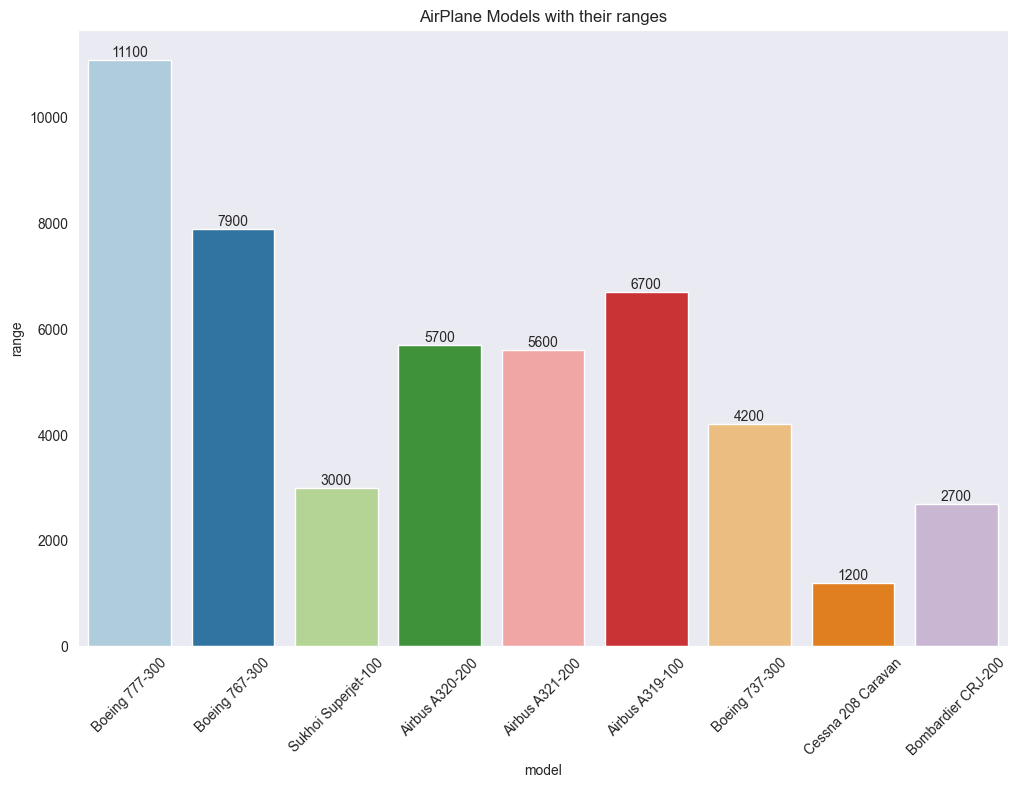

In [13]:
aircrafts_data['model'] = aircrafts_data['model'].apply(lambda x: json.loads(x)['en'])
aircrafts_data

sns.set_style('dark')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=aircrafts_data['model'],y='range', data=aircrafts_data, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('AirPlane Models with their ranges')
plt.xticks(rotation=45)
plt.show()

### How many planes have more than 100 seats

In [14]:
df1  =  pd.read_sql_query("""SELECT s.aircraft_code, JSON_EXTRACT(model, '$.en') AS model, COUNT(*) AS num_seats 
                             FROM seats AS s
                             JOIN aircrafts_data AS a
                             ON s.aircraft_code = a.aircraft_code
                             GROUP BY s.aircraft_code
                             HAVING num_seats > 100
                             ORDER BY num_seats DESC""", conn)

df1

,aircraft_code,model,num_seats
0,773,Boeing 777-300,402
1,763,Boeing 767-300,222
2,321,Airbus A321-200,170
3,320,Airbus A320-200,140
4,733,Boeing 737-300,130
5,319,Airbus A319-100,116


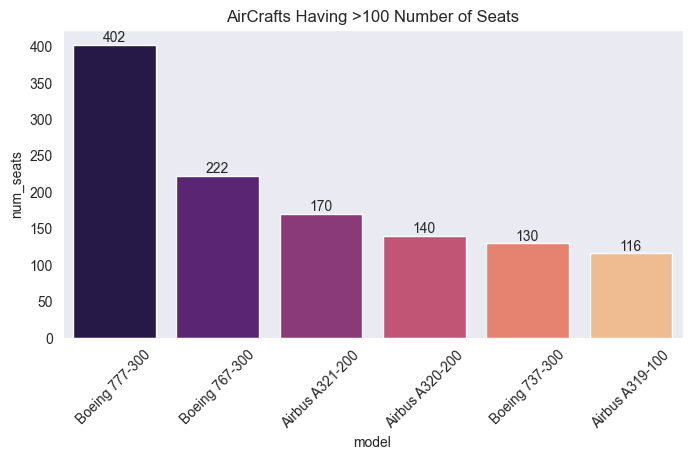

In [15]:
sns.set_style('dark')
plt.figure(figsize = (8,4))
ax  =  sns.barplot(x = 'model', y = 'num_seats', data = df1, palette = 'magma')

for container in ax.containers:
    ax.bar_label(container)

plt.title('AirCrafts Having >100 Number of Seats')
plt.xticks(rotation = 45)
plt.show()

### Examine the temporal trends in the number of tickets booked and the total amount earned.

In [16]:

tickets = pd.read_sql_query("""select ticket_no, SUBSTR(book_date,1,10) AS date, total_amount from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref
                    group by date
                    order by date""", conn)

tickets.head(30)

,ticket_no,date,total_amount
0,0005432628587,2017-06-21,52000
1,0005432984533,2017-06-22,123000
2,0005432150056,2017-06-23,64700
3,0005432056234,2017-06-24,13000
4,0005432034471,2017-06-25,6000
5,0005432045579,2017-06-26,14900
6,0005432002041,2017-06-27,17600
7,0005432003645,2017-06-28,99800
8,0005432000989,2017-06-29,24700
9,0005432000999,2017-06-30,6200


In [17]:
tickets1 = pd.read_sql_query("""select SUBSTR(book_date,1,10) AS date, COUNT(ticket_no) AS tickets, total_amount AS ticket_amount, sum(total_amount) AS amount_sum from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref
                    group by date
                    order by date""", conn)
# tickets1 = tickets1.set_index('date', drop=True)

tickets1

,date,tickets,ticket_amount,amount_sum
0,2017-06-21,6,52000,916100
1,2017-06-22,12,123000,1536300
2,2017-06-23,28,64700,3114800
3,2017-06-24,106,13000,10279900
4,2017-06-25,266,6000,24652200
5,2017-06-26,499,14900,48710400
6,2017-06-27,1028,17600,88733500
7,2017-06-28,1678,99800,147624200
8,2017-06-29,2765,24700,248677900
9,2017-06-30,3772,6200,337783200


In [18]:
tickets1['date'] = pd.to_datetime(tickets1['date'])

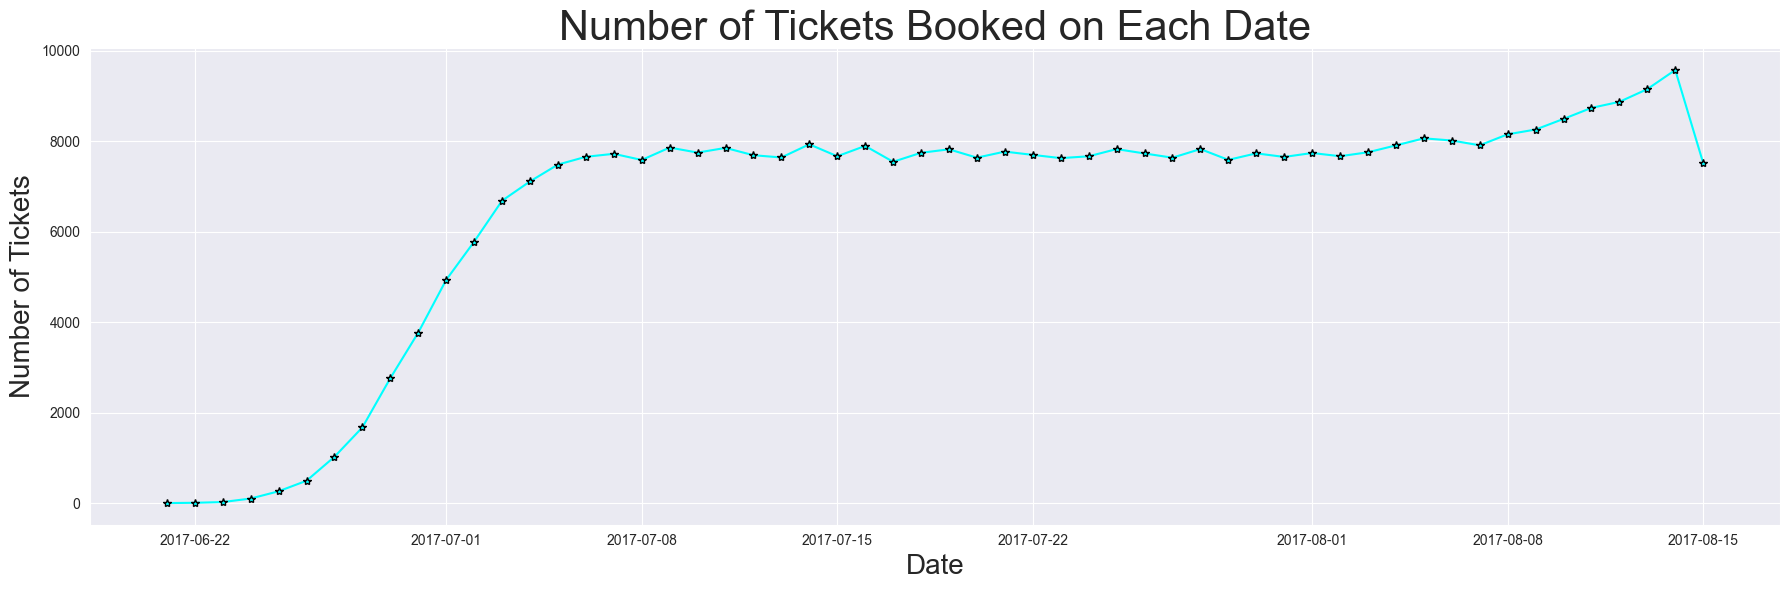

In [19]:

plt.figure(figsize=(18, 6))

plt.plot(tickets1.date, tickets1.tickets, label='Tickets', color='cyan', scalex=True, marker='*', markeredgecolor = 'black')

plt.title('Number of Tickets Booked on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid('dark')
plt.tight_layout()  # Ensures all elements fit within the figure area
plt.show()


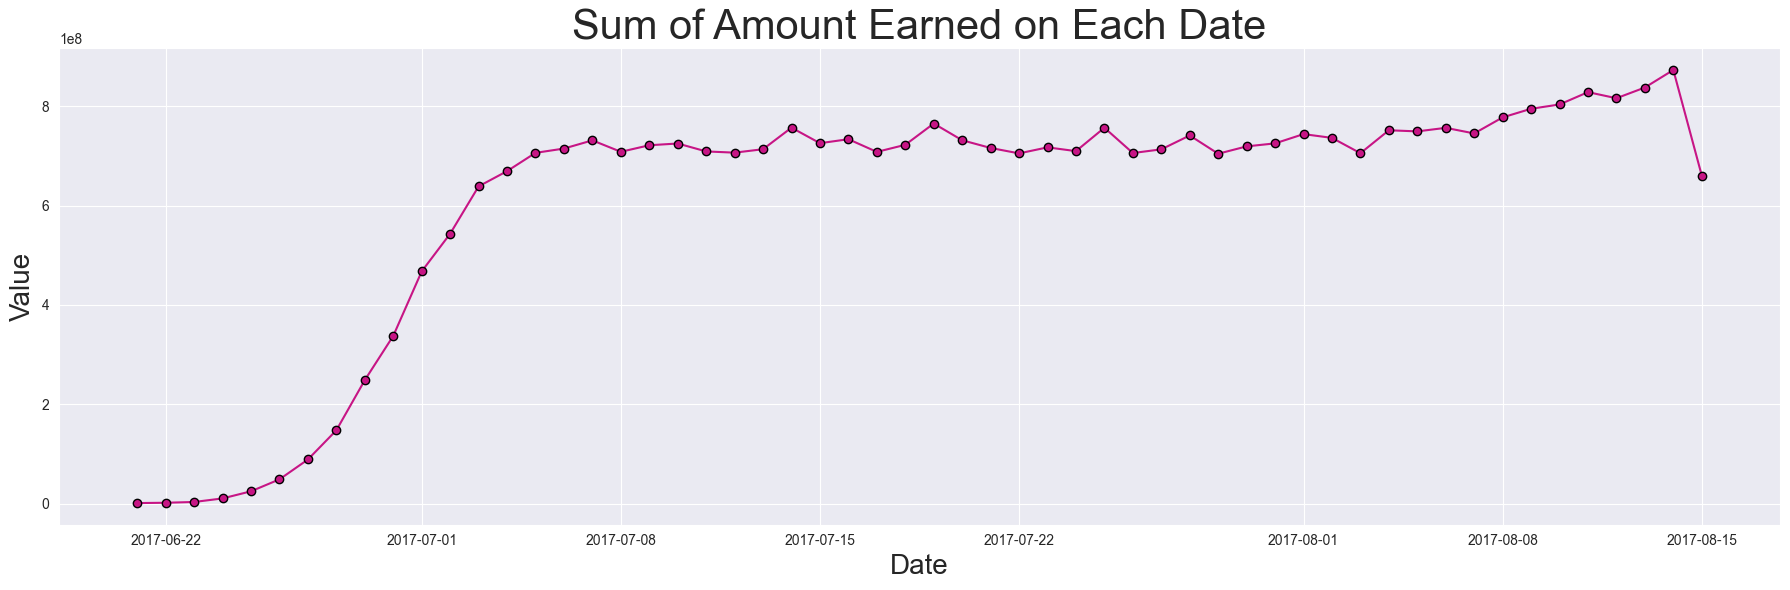

In [20]:
plt.figure(figsize=(18, 6))

# Plot the 'amount_sum' line
plt.plot(tickets1.date, tickets1.amount_sum, label='Amount Sum', color='mediumvioletred', marker='o', markeredgecolor='black')

plt.title('Sum of Amount Earned on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Value', fontsize=20)
plt.grid('dark')
plt.tight_layout()

plt.show()

### Compute the Average Costs associated with different Fare_Conditions for each Aircraft.

In [21]:
df2 = pd.read_sql_query("""SELECT a.aircraft_code, JSON_EXTRACT(model, '$.en') AS model,
                            tf.fare_conditions AS class, avg(tf.amount) AS avg_amount
                            FROM aircrafts_data AS a
                            JOIN flights AS f
                            ON a.aircraft_code = f.aircraft_code
                            JOIN ticket_flights AS tf
                            ON f.flight_id = tf.flight_id
                            GROUP BY model, class
                            ORDER BY avg_amount DESC""", conn)

df2

,aircraft_code,model,class,avg_amount
0,319,Airbus A319-100,Business,113550.557703
1,763,Boeing 767-300,Business,82839.842866
2,773,Boeing 777-300,Business,57779.909435
3,733,Boeing 737-300,Business,41865.626175
4,319,Airbus A319-100,Economy,38311.402347
5,321,Airbus A321-200,Business,34435.662664
6,SU9,Sukhoi Superjet-100,Business,33487.849829
7,773,Boeing 777-300,Comfort,32740.552889
8,763,Boeing 767-300,Economy,27594.721829
9,773,Boeing 777-300,Economy,19265.225693


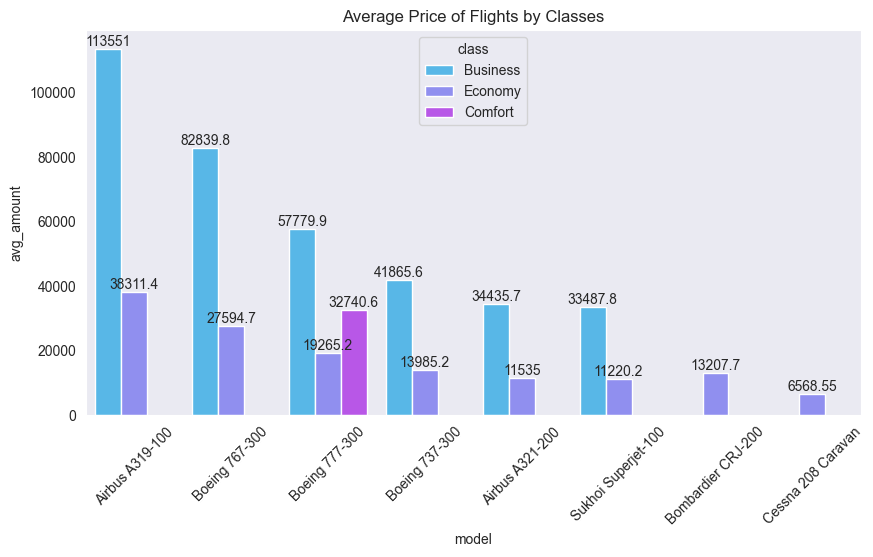

In [22]:
sns.set_style('dark')
plt.figure(figsize = (10,5))
ax  =  sns.barplot(x = 'model', y = 'avg_amount', hue = 'class', data = df2, palette = 'cool')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Average Price of Flights by Classes')
plt.xticks(rotation = 45)
plt.show()

### What is the Total Revenue and Average Revenue for each Aircraft?






In [23]:
revenue  =  pd.read_sql_query("""SELECT aircraft_code, model, ticket_count, total_revenue, total_revenue/ticket_count AS avg_revenue_per_ticket FROM
                                 (SELECT a.aircraft_code, JSON_EXTRACT(model, '$.en') AS model,
                                 COUNT(*) AS ticket_count, SUM(tf.amount) AS total_revenue FROM aircrafts_data AS a
                                 JOIN flights AS f
                                 ON a.aircraft_code = f.aircraft_code
                                 JOIN ticket_flights AS tf
                                 ON f.flight_id = tf.flight_id
                                 GROUP BY a.aircraft_code)""", conn)
revenue

,aircraft_code,model,ticket_count,total_revenue,avg_revenue_per_ticket
0,319,Airbus A319-100,52853,2706163100,51201
1,321,Airbus A321-200,107129,1638164100,15291
2,733,Boeing 737-300,86102,1426552100,16568
3,763,Boeing 767-300,124774,4371277100,35033
4,773,Boeing 777-300,144376,3431205500,23765
5,CN1,Cessna 208 Caravan,14672,96373800,6568
6,CR2,Bombardier CRJ-200,150122,1982760500,13207
7,SU9,Sukhoi Superjet-100,365698,5114484700,13985


### What is the average Occupancy Rate for each Aircraft?




In [24]:
# Define the SQL query to create the view

# Drop the existing table 'bh' if it exists
drop_table_query = "DROP VIEW IF EXISTS flight_booked_seats;"
cursor.execute(drop_table_query)

# Create the view 'bbh'
create_view_query = """
CREATE VIEW flight_booked_seats AS
SELECT aircraft_code, flights.flight_id, COUNT(*) as seats_count
FROM boarding_passes
INNER JOIN flights 
ON boarding_passes.flight_id=flights.flight_id
GROUP BY aircraft_code, flights.flight_id;
"""
cursor.execute(create_view_query)

# Commit the changes to the database
conn.commit()

# Now you can read the view data using a SELECT query
f_b_s = pd.read_sql_query("SELECT * FROM flight_booked_seats", conn)

f_b_s


,aircraft_code,flight_id,seats_count
0,319,1162,51
1,319,1166,54
2,319,1167,57
3,319,1168,60
4,319,1170,58
...,...,...,...
11513,SU9,32925,12
11514,SU9,32928,25
11515,SU9,32931,12
11516,SU9,32933,16


In [25]:
# Define the SQL query to create the view

# Drop the existing table 'num_seats' if it exists
drop_table_query = "DROP VIEW IF EXISTS num_seats;"
cursor.execute(drop_table_query)

# Create the view 'num_seats'
create_view_query = """
CREATE VIEW num_seats AS
SELECT s.aircraft_code, JSON_EXTRACT(model, '$.en') AS model, COUNT(*) AS num_seats 
                             FROM seats AS s
                             JOIN aircrafts_data AS a
                             ON s.aircraft_code = a.aircraft_code
                             GROUP BY s.aircraft_code
                             
                             ORDER BY num_seats DESC;
"""
cursor.execute(create_view_query)

# Commit the changes to the database
conn.commit()

# Now you can read the view data using a SELECT query
num_seats = pd.read_sql_query("SELECT * FROM num_seats", conn)

num_seats

,aircraft_code,model,num_seats
0,773,Boeing 777-300,402
1,763,Boeing 767-300,222
2,321,Airbus A321-200,170
3,320,Airbus A320-200,140
4,733,Boeing 737-300,130
5,319,Airbus A319-100,116
6,SU9,Sukhoi Superjet-100,97
7,CR2,Bombardier CRJ-200,50
8,CN1,Cessna 208 Caravan,12


In [26]:
occupancy_rate  =  pd.read_sql_query("""SELECT a.aircraft_code, model, b.num_seats, ROUND(AVG(a.seats_count)) AS booked_seats, AVG(a.seats_count)/b.num_seats AS occupancy_rate
                                        FROM flight_booked_seats AS a
                                        JOIN num_seats AS b
                                        ON a.aircraft_code = b.aircraft_code
                                        GROUP BY a.aircraft_code
                                        ORDER BY occupancy_rate DESC""", conn)
occupancy_rate

,aircraft_code,model,num_seats,booked_seats,occupancy_rate
0,773,Boeing 777-300,402,265.0,0.659019
1,733,Boeing 737-300,130,80.0,0.617350
2,SU9,Sukhoi Superjet-100,97,57.0,0.585692
3,321,Airbus A321-200,170,89.0,0.522407
4,763,Boeing 767-300,222,114.0,0.513231
5,CN1,Cessna 208 Caravan,12,6.0,0.500369
6,319,Airbus A319-100,116,54.0,0.461924
7,CR2,Bombardier CRJ-200,50,21.0,0.429657


### How much would the total annual turnover increase if all aircraft were to have a 10% higher occupancy rate?

In [27]:
occupancy_rate['Inc occupancy_rate']  =  occupancy_rate['occupancy_rate']  +  occupancy_rate['occupancy_rate'] * 0.1

occupancy_rate

,aircraft_code,model,num_seats,booked_seats,occupancy_rate,Inc occupancy_rate
0,773,Boeing 777-300,402,265.0,0.659019,0.724921
1,733,Boeing 737-300,130,80.0,0.617350,0.679085
2,SU9,Sukhoi Superjet-100,97,57.0,0.585692,0.644261
3,321,Airbus A321-200,170,89.0,0.522407,0.574648
4,763,Boeing 767-300,222,114.0,0.513231,0.564554
5,CN1,Cessna 208 Caravan,12,6.0,0.500369,0.550406
6,319,Airbus A319-100,116,54.0,0.461924,0.508116
7,CR2,Bombardier CRJ-200,50,21.0,0.429657,0.472623


In [28]:
total_revenue = pd.read_sql_query("""SELECT aircraft_code, SUM(amount) as total_revenue  FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code""", conn)

total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [29]:
# Set the float formatting options
pd.options.display.float_format = '{:.1f}'.format


occupancy_rate['Inc Total Annual Turnover']  =  (total_revenue['total_revenue']/occupancy_rate['occupancy_rate']) * occupancy_rate['Inc occupancy_rate']

occupancy_rate

,aircraft_code,model,num_seats,booked_seats,occupancy_rate,Inc occupancy_rate,Inc Total Annual Turnover
0,773,Boeing 777-300,402,265.0,0.7,0.7,2976779410.0
1,733,Boeing 737-300,130,80.0,0.6,0.7,1801980510.0
2,SU9,Sukhoi Superjet-100,97,57.0,0.6,0.6,1569207310.0
3,321,Airbus A321-200,170,89.0,0.5,0.6,4808404810.0
4,763,Boeing 767-300,222,114.0,0.5,0.6,3774326050.0
5,CN1,Cessna 208 Caravan,12,6.0,0.5,0.6,106011180.0
6,319,Airbus A319-100,116,54.0,0.5,0.5,2181036550.0
7,CR2,Bombardier CRJ-200,50,21.0,0.4,0.5,5625933170.0


## Key Insights

The case-study involved analyzing an SQLite database containing various tables related to flights, bookings, aircrafts, airports, and more. The following key insights were derived from the analysis:

1. The dataset includes information on various aircraft models and their respective ranges. The Boeing 777-300 model has the highest range of 11100, followed by Boeing 767-300 with a range of 7900.

2. The number of planes with more than 100 seats is determined. The Boeing 777-300 has the highest number of seats (402), followed by Boeing 767-300 with 222 seats.

3. The temporal trends in the number of tickets booked and the total amount earned are visualized. The number of tickets booked and the total revenue earned has increased over time, indicating positive growth.

4. The average costs associated with different fare conditions for each aircraft are calculated. The Airbus A319-100 has the highest average price for Business class, while the Bombardier CRJ-200 has the lowest average price for Economy class.

5. The total revenue and average revenue per ticket for each aircraft are computed. The Boeing 777-300 generated the highest total revenue, while the Cessna 208 Caravan generated the lowest.

6. The average occupancy rate for each aircraft is determined. The Boeing 777-300 has the highest occupancy rate, indicating efficient utilization of seats, while the Bombardier CRJ-200 has the lowest occupancy rate.


## Recommendations

Based on the data analysis, the following recommendations are provided to the airline company:

1. Focus on increasing occupancy rates: Implement strategies to improve seat occupancy and maximize revenue per flight.
2. Optimize fare conditions: Analyze fare conditions and pricing strategies to attract more customers without compromising revenue.
3. Invest in fuel-efficient aircraft: Upgrade the fleet with fuel-efficient aircraft to reduce operational costs and carbon footprint.
4. Improve workforce management: Implement measures to address the labor market challenges and reduce labor costs.

By leveraging data insights and implementing the recommended strategies, the airline company can enhance its profitability and ensure long-term sustainability in the competitive aviation industry.

## Conclusion
In conclusion, airlines can maximize profitability by analyzing revenue data and making informed decisions. Factors such as total revenue, average revenue per ticket, and average occupancy per aircraft play a crucial role in this analysis. By identifying areas for improvement, adjusting pricing strategies, and optimizing routes, airlines can increase their profitability. However, it's important for airlines to consider consumer happiness and safety while striving for profit. Balancing these factors is key to long-term success in the competitive airline industry. Adopting a data-driven approach to revenue analysis and optimization can lead to sustainable growth and success.

# Project Learning: Airline Data Analytics with SQLite and Python

Throughout the Airline Data Analytics project, several Python and SQL concepts were utilized to analyze the database and derive meaningful insights. Here are the key learning points:

1. **SQLite Database Interaction:**
   - Connecting to a SQLite database using Python's SQLite3 library.
   - Executing SQL queries to retrieve data from the database.
   - Fetching query results and working with data in Python.

2. **Data Retrieval and Manipulation:**
   - Using SQL SELECT statements to retrieve specific columns and rows from database tables.
   - Filtering data using SQL WHERE clause to focus on relevant information.
   - Employing SQL aggregate functions like SUM, COUNT, and AVERAGE to calculate useful metrics.

3. **Data Visualization:**
   - Using Python's data visualization libraries (e.g., Matplotlib, Seaborn) to create charts and plots.
   - Visualizing temporal trends in data to observe patterns and changes over time.

4. **Data Analysis and Insights:**
   - Deriving insights from data trends and patterns to make strategic decisions.
   - Identifying key performance indicators (KPIs) to measure the company's performance.

5. **Statistical Analysis:**
   - Calculating average values, revenue, and occupancy rates for different aircraft models.
   - Comparing performance metrics to evaluate the effectiveness of strategies.

6. **Business Strategy and Decision Making:**
   - Utilizing data insights to address business challenges and make informed decisions.
   - Formulating strategies to improve aircraft occupancy rates and maximize profitability.

7. **Environmental and Regulatory Considerations:**
   - Understanding the impact of stricter environmental regulations on the aviation industry.
   - Exploring ways to meet regulatory requirements and reduce the carbon footprint.

8. **Financial Analysis:**
   - Analyzing revenue data to identify top-performing aircraft models.
   - Calculating potential revenue increases by optimizing aircraft occupancy rates.

9. **Resource Management:**
   - Analyzing labor costs and turnover rates to address challenges in the tight labor market.
   - Identifying opportunities to optimize resources and improve cost-efficiency.

10. **Partnership and Collaboration:**
    - Exploring possibilities of collaboration with governments and stakeholders to address challenges like flight taxes and environmental regulations.

11. **Sustainable Growth Strategies:**
    - Evaluating the benefits of investing in newer, fuel-efficient aircraft models with larger seating capacities.
    - Leveraging data analytics to optimize flight schedules and improve customer satisfaction.

12. **Presentation Skills:**
    - Organizing the analysis and insights into a coherent and visually appealing presentation.
    - Effectively communicating the results and recommendations to stakeholders.

By working on this project, the team members honed their skills in Python programming, SQL database management, data analysis, and strategic decision-making. The project provided valuable experience in addressing real-world challenges faced by the aviation industry and demonstrated the significance of data-driven approaches to achieve sustainable growth and success.